In [ ]:
1. MAE (Mean Absolute Error)
2. MSE (Mean Squared Error)
3. RMSE (Root Mean Square Error)
These are called loss funtion or Error Function.
4. R2 Score
5. Adjustd R2 Score

### 1. MAE (Mean Absolute Error)

In [ ]:
If you are working in Simple linear regression, where one input and one output.

In [ ]:
Total absolute error = |y1-y1>| + |y2-y2>| + |y3-y3>| + ... + |yn-yn>|

In [ ]:
MAE =(|y1-y1>| + |y2-y2>| + |y3-y3>| + ... + |yn-yn>|)/n

In [ ]:
MAE = SUM|yi-yi>|/n

In [ ]:
Advantages
1. Same unit
2. Robust to outliers mean handle the outliers.

Disadvantages:
1. Modulous graph is not diffrenciable.

### 2. MSE (Mean Squared Error)

In [ ]:
MSE = SUM(yi-yi>)*2/n

In [ ]:
Advantages:
1. Diffrencialble

Disadvantage:
1. Not robust to outliers    

### 3. RMSE (Root Mean Square Error)

In [ ]:
RMSE = root of MSE SUM(yi-yi>)*2/n

In [ ]:
Advantages:
1. Diffrencialble

Disadvantage:
1. Not robust to outliers 

### 4. R2 Score

In [ ]:
It will tell how well the model is performing.

In [ ]:
R2 Score also known as Coeficient of Determination or Goodness of fit

formuls = 1 - SSR/SSm

SSR = Sum of square Error in the Regression line
SSm = Sum of squre Error in the mean line

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package(in lpa)')

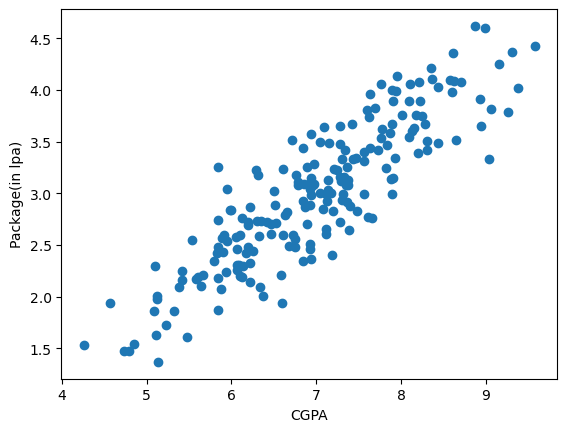

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [6]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
X_train.shape

(160, 1)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

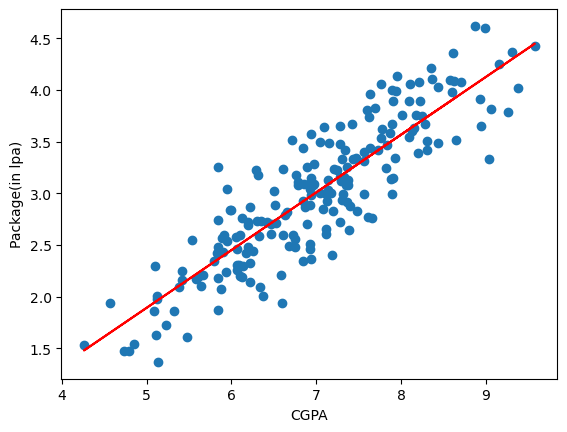

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
y_pred = lr.predict(X_test)

In [19]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [21]:
print("MAE", mean_absolute_error(y_test,y_pred))  # It is doing mistake in 28% result in LPA

MAE 0.2884710931878175


In [22]:
print("MSE", mean_squared_error(y_test,y_pred))  # It is doing mistake in 12% result is not in LPA

MSE 0.12129235313495527


In [24]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)) )  # Result is not in LPA

RMSE 0.34827051717731616


In [26]:
print("MSE", r2_score(y_test,y_pred)) # How much the model is working in %

r2 =  r2_score(y_test,y_pred)

MSE 0.780730147510384


In [29]:
# Adjusted r2_score
X_test.shape

(40, 1)

In [32]:
Adjusted_r2_score = 1-((1-r2)*(40-1)/(40-1-1))

In [33]:
Adjusted_r2_score # Very close to r2

0.7749598882343415

## Check r2 and Adusted_r2_score after adding new column

In [34]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.009890,3.26
1,5.12,0.803185,1.98
2,7.82,0.588201,3.25
3,7.42,0.052758,3.67
4,6.94,0.642891,3.57


Text(0, 0.5, 'Package(in lpa)')

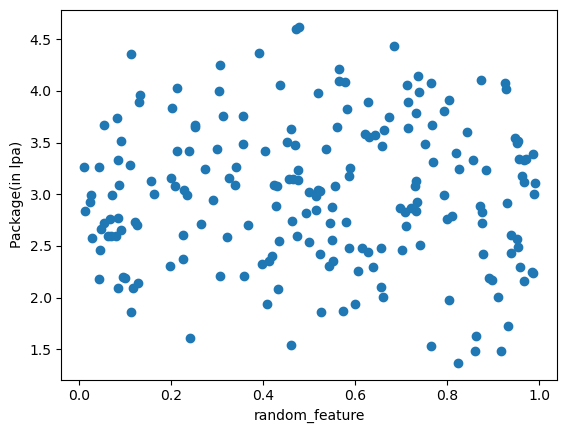

In [35]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [36]:
x=new_df1.iloc[:,0:2]
y=new_df1.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
print("r2 score", r2_score(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

r2 score 0.780904077977054


In [43]:
Adjusted_r2_score = 1-((1-r2)*(40-1)/(40-1-2))

In [44]:
Adjusted_r2_score

0.7690610551650028

## add new column to the dataframe that is relavent

In [46]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)
new_df2 = new_df2[['cgpa', 'iq','package']]

In [47]:
new_df2

,cgpa,iq,package
0,6.89,3.66,3.26
1,5.12,1.18,1.98
2,7.82,2.95,3.25
3,7.42,2.47,3.67
4,6.94,4.07,3.57
...,...,...,...
195,6.93,1.86,2.46
196,5.89,3.47,2.57
197,7.21,4.14,3.24
198,7.63,4.86,3.96


Text(0, 0.5, 'Package(in lpa)')

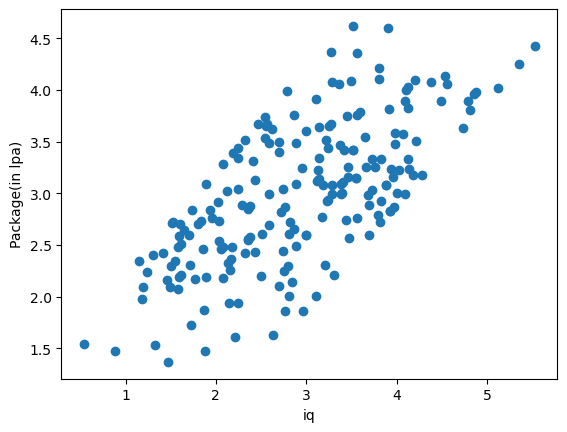

In [49]:
plt.scatter(new_df2['iq'],new_df1['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [50]:
x=new_df2.iloc[:,0:2]
y=new_df2.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [53]:
print("r2 score", r2_score(y_test,y_pred))
r2 = r2_score(y_test, y_pred)

r2 score 0.8099946964475124


In [54]:
Adjusted_r2_score = 1-((1-r2)*(40-1)/(40-1-2))

In [55]:
Adjusted_r2_score

0.7997241394987293